# Анализ датасета

### Импорт библиотек

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка датасета с путём к каждому изображению и его классу

In [5]:
path = 'E:\datasets\dataset-clear' # Путь к папке с классами
path_imgs = list(glob.glob(path+'/**/*.jpg')) # Пути к каждой фотке
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs)) # Класс к каждой фотке
#Преобразование в Series
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
# Создание самого датасета
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,E:\datasets\dataset-clear\clear\29952142.jpg,clear
1,E:\datasets\dataset-clear\snow\376451884.jpg,snow
2,E:\datasets\dataset-clear\clear\27456604.jpg,clear
3,E:\datasets\dataset-clear\rain\287540063.jpg,rain
4,E:\datasets\dataset-clear\frost\5170.jpg,frost


### Построение картинок и классов к датасету, проверка на загрузку

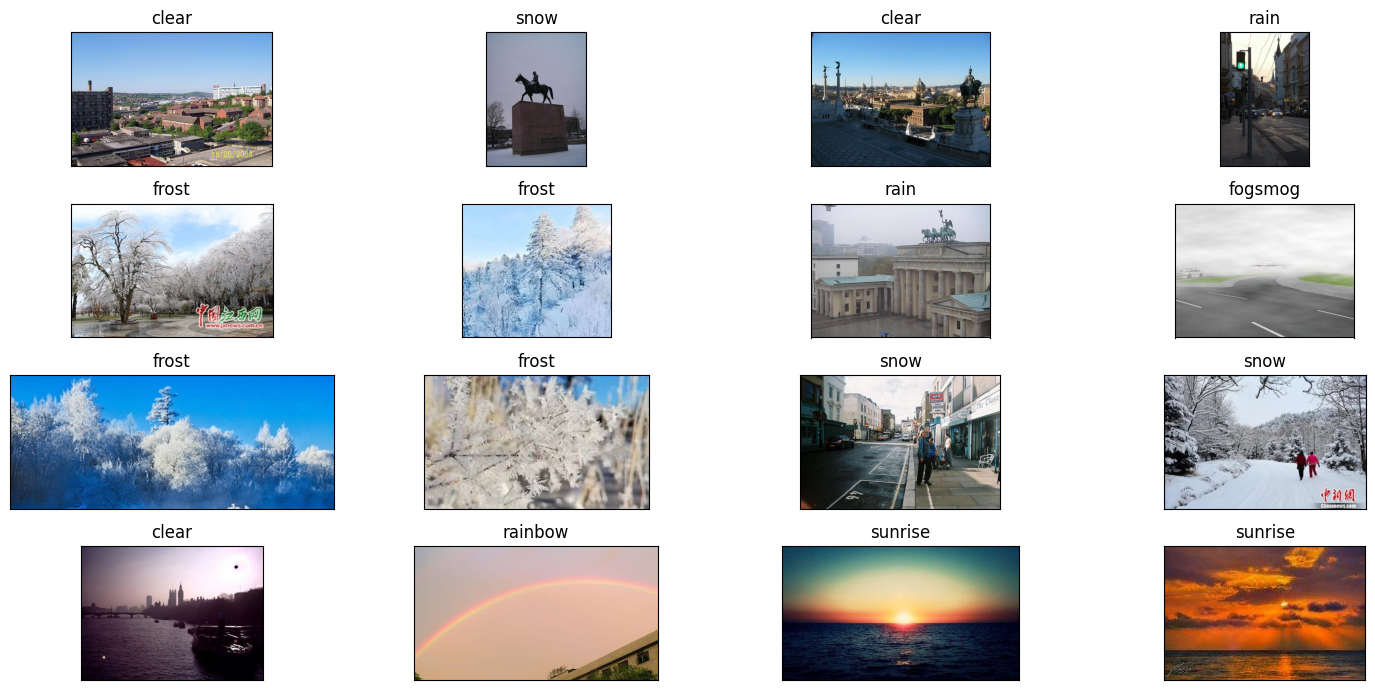

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), #Размер вывода
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

### Вывод количества данных по каждому классу

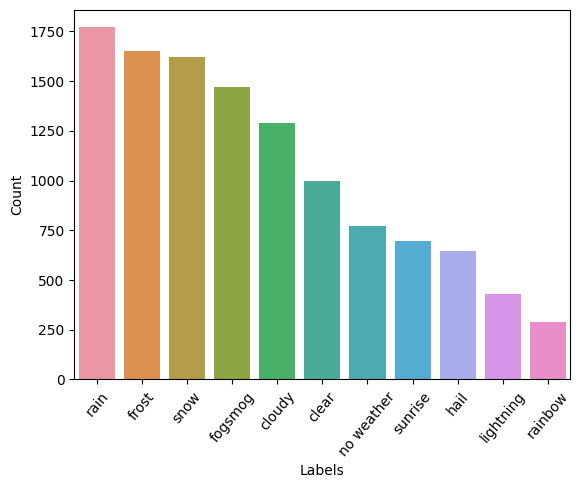

In [7]:
counts = data.Labels.value_counts() # Подсчёт значений
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50);